#### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Data
df = pd.read_csv('dataset/train.csv')

#### Initial Data Inspection

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [7]:
# Column name standardization. Convert column names into snake_case for concistency and ease of use.
df.columns = (df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_'))

In [8]:
# Check missing values
df.isnull().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
dtype: int64

In [9]:
df[df['postal_code'].isnull()]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [10]:
# Missing postal codes were only found in Burlington’s East region, so they were filled in with the correct postal code 05401.

df['postal_code'] = df['postal_code'].fillna('05401')


In [11]:
df.isnull().sum().sum()

np.int64(0)

#### Data Type Conversion


In [12]:
# Convert Date column to Datetime format.
df['order_date'] = pd.to_datetime(df['order_date'], format = '%d/%m/%Y')
df['ship_date'] = pd.to_datetime(df['ship_date'], format = '%d/%m/%Y')

#Verify Date column data types.
print("Order date data type:", df['order_date'].dtype)
print("Ship data type:", df['ship_date'].dtype)

# Convert Postal code to string for consistent data formatting.
df['postal_code'] = df['postal_code'].astype(str)

#verify Postal code data type
print("Postal Code data type:", df['postal_code'].dtype)

Order date data type: datetime64[ns]
Ship data type: datetime64[ns]
Postal Code data type: object


#### data set summary after cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9800 non-null   int64         
 1   order_id       9800 non-null   object        
 2   order_date     9800 non-null   datetime64[ns]
 3   ship_date      9800 non-null   datetime64[ns]
 4   ship_mode      9800 non-null   object        
 5   customer_id    9800 non-null   object        
 6   customer_name  9800 non-null   object        
 7   segment        9800 non-null   object        
 8   country        9800 non-null   object        
 9   city           9800 non-null   object        
 10  state          9800 non-null   object        
 11  postal_code    9800 non-null   object        
 12  region         9800 non-null   object        
 13  product_id     9800 non-null   object        
 14  category       9800 non-null   object        
 15  sub_category   9800 n

#### Exploratory Data Analysis

In [14]:
df.describe()

,row_id,order_date,ship_date,sales
count,9800.000000,9800,9800,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000
std,2829.160653,NaN,NaN,626.651875


#### date columns span from 2015 to 2018, enabling time based analysis.
#### Sales Distribution is highly right skewed with a median far lower than mean.
#### Presence of extreme high-value indicates business outliers.  

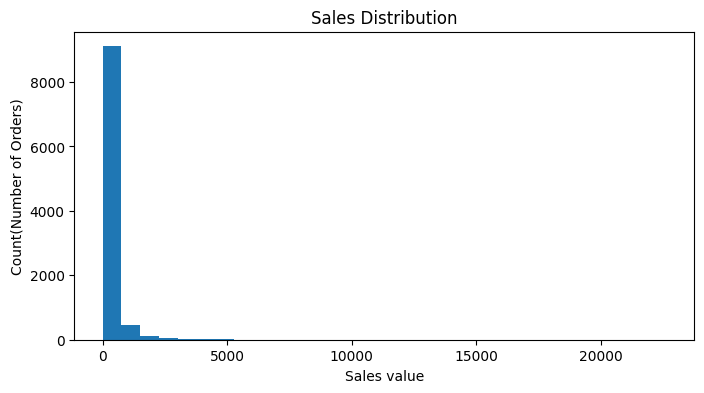

In [15]:
plt.figure(figsize = (8,4))
plt.hist(df['sales'], bins = 30)
plt.xlabel("Sales value")
plt.ylabel("Count(Number of Orders)")
plt.title("Sales Distribution")
plt.show()

##### Most orders have low sales values.
##### A few orders have very high sales values.    
##### This distribution is right skewed.

### Boxplot for outlier detection



plt.figure(figsize = (8,3))
plt.boxplot(df['sales'], vert = False)
plt.xscale("log")
plt.xlabel("Sales Amount(Log Scale)")
plt.show()

In [16]:
# Skewness

df['sales'].skew()

np.float64(12.983482865034615)

### Outlier detection using IQR Method

In [17]:
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5* IQR

### Identify Outliers

In [18]:
outliers = df[(df['sales']<lower_bound) | (df['sales']>upper_bound)]

In [19]:
outliers.shape

(1145, 18)

In [20]:
outliers.describe()

,row_id,order_date,ship_date,sales
count,1145.000000,1145,1145,1145.000000
mean,4780.913537,2017-04-08 19:34:38.253274880,2017-04-12 17:17:33.275109120,1270.546212
min,2.000000,2015-01-06 00:00:00,2015-01-10 00:00:00,501.810000
25%,2419.000000,2016-04-13 00:00:00,2016-04-18 00:00:00,636.860000
50%,4683.000000,2017-05-20 00:00:00,2017-05-25 00:00:00,871.400000
75%,7258.000000,2018-05-01 00:00:00,2018-05-06 00:00:00,1348.704000
max,9789.000000,2018-12-29 00:00:00,2019-01-02 00:00:00,22638.480000
std,2813.959366,NaN,NaN,1427.896223


In [21]:
# Top extreme sales
outliers.sort_values('sales', ascending = False).head(10) 

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
2697,2698,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480
6826,6827,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905.0,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950
8153,8154,CA-2018-140151,2018-03-23,2018-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115.0,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960
2623,2624,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968
4190,4191,CA-2018-166709,2018-11-17,2018-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970
9039,9040,CA-2017-117121,2017-12-17,2017-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,Michigan,48205.0,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740
4098,4099,CA-2015-116904,2015-09-23,2015-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,Minnesota,55407.0,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950
4277,4278,US-2017-107440,2017-04-16,2017-04-20,Standard Class,BS-11365,Bill Shonely,Corporate,United States,Lakewood,New Jersey,8701.0,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930
8488,8489,CA-2017-158841,2017-02-02,2017-02-04,Second Class,SE-20110,Sanjit Engle,Consumer,United States,Arlington,Virginia,22204.0,South,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950
6425,6426,CA-2017-143714,2017-05-23,2017-05-27,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976


#### The sales distribution is right-skewed, and while high-value outliers exist,
#### they represent genuine large orders and contribute significantly to revenue.
#### Therefore, we will retain outliers for business analysis.
#### Outlier removal will only be considered if we proceed to predictive modeling.

### Sales Perofmance Analysis

In [22]:
df['sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: sales, dtype: float64

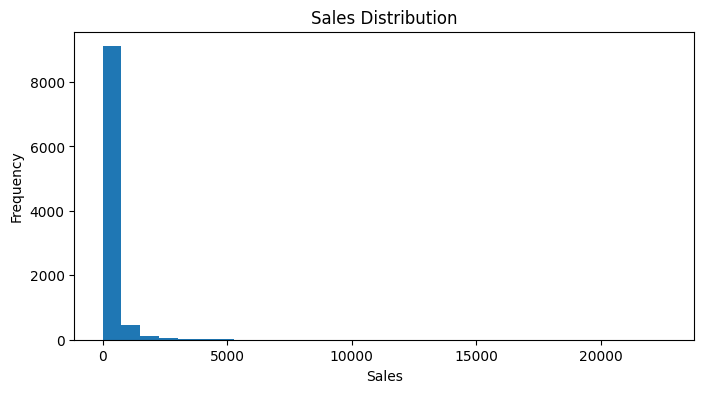

In [23]:
plt.figure(figsize = (8,4))
plt.hist(df['sales'], bins = 30)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [24]:
df.sort_values('sales', ascending = False).head(10)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
2697,2698,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480
6826,6827,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905.0,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950
8153,8154,CA-2018-140151,2018-03-23,2018-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115.0,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960
2623,2624,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968
4190,4191,CA-2018-166709,2018-11-17,2018-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970
9039,9040,CA-2017-117121,2017-12-17,2017-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,Michigan,48205.0,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740
4098,4099,CA-2015-116904,2015-09-23,2015-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,Minnesota,55407.0,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950
4277,4278,US-2017-107440,2017-04-16,2017-04-20,Standard Class,BS-11365,Bill Shonely,Corporate,United States,Lakewood,New Jersey,8701.0,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930
8488,8489,CA-2017-158841,2017-02-02,2017-02-04,Second Class,SE-20110,Sanjit Engle,Consumer,United States,Arlington,Virginia,22204.0,South,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950
6425,6426,CA-2017-143714,2017-05-23,2017-05-27,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976


### Time Based Trend Analysis

In [25]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month


In [26]:
print(df['year'].dtype)

int32


In [27]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,year,month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10


#### Yearly Sales Trend

In [28]:
yearly_sales = df.groupby('year')['sales'].sum()

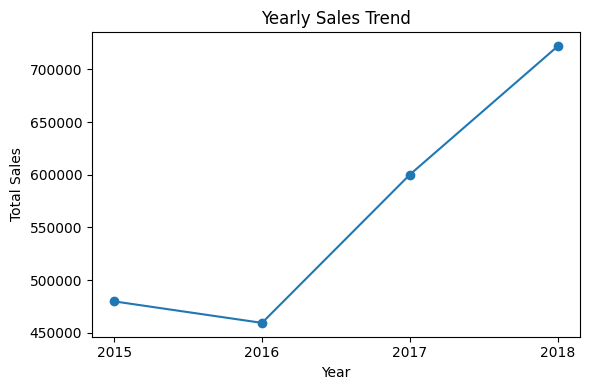

In [29]:
plt.figure(figsize = (6,4))
plt.plot(yearly_sales.index, yearly_sales.values, marker = 'o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(yearly_sales.index)
plt.tight_layout()
plt.show()

#### Monthly Sales Trend

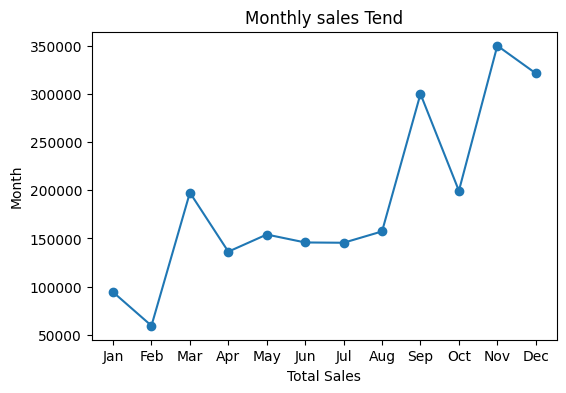

In [30]:
monthly_sales = df.groupby('month')['sales'].sum()
plt.figure(figsize = (6,4))
plt.plot(monthly_sales.index, monthly_sales.values, marker = 'o')
plt.xticks(ticks = monthly_sales.index, 
          labels = pd.to_datetime(monthly_sales.index, format = '%m').strftime('%b'))
plt.title('Monthly sales Tend')
plt.xlabel('Total Sales')
plt.ylabel('Month')
plt.show()

### Regional Performance Analysis

In [31]:
df.groupby('region')['sales'].sum()

region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: sales, dtype: float64

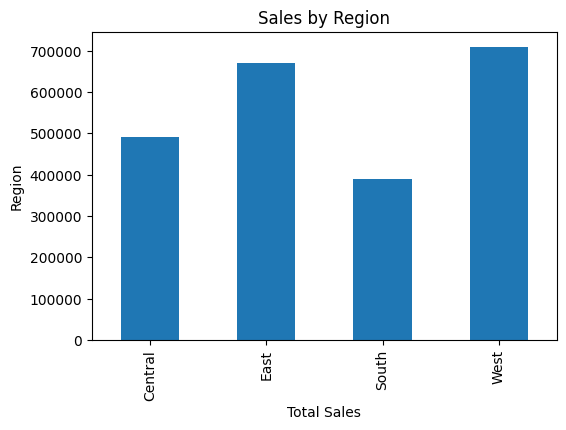

In [32]:
plt.figure(figsize = (6,4))
df.groupby('region')['sales'].sum().plot(kind = 'bar')
plt.title('Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()

### Category level Sales

In [33]:
df.groupby('category')['sales'].sum()

category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: sales, dtype: float64

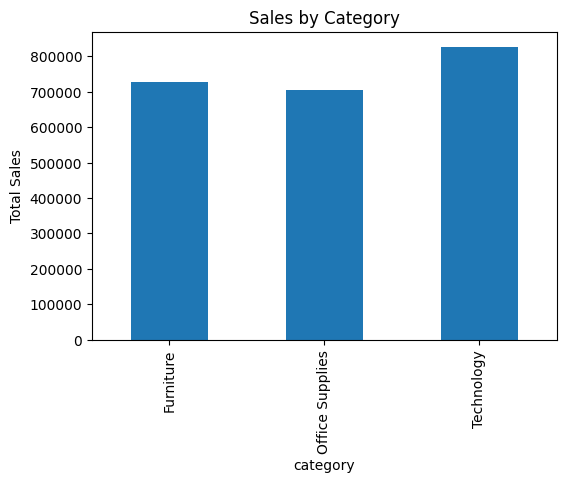

In [34]:
plt.figure(figsize = (6,4))
df.groupby('category')['sales'].sum().plot(kind = 'bar')
plt.title('Sales by Category')
plt.ylabel('Total Sales')
plt.show()

### Sub-Category level Sales

In [35]:
df.groupby('sub_category')['sales'].sum().sort_values()

sub_category
Fasteners        3001.9600
Labels          12347.7260
Envelopes       16128.0460
Art             26705.4100
Supplies        46420.3080
Paper           76828.3040
Furnishings     89212.0180
Appliances     104618.4030
Bookcases      113813.1987
Copiers        146248.0940
Accessories    164186.7000
Machines       189238.6310
Binders        200028.7850
Tables         202810.6280
Storage        219343.3920
Chairs         322822.7310
Phones         327782.4480
Name: sales, dtype: float64

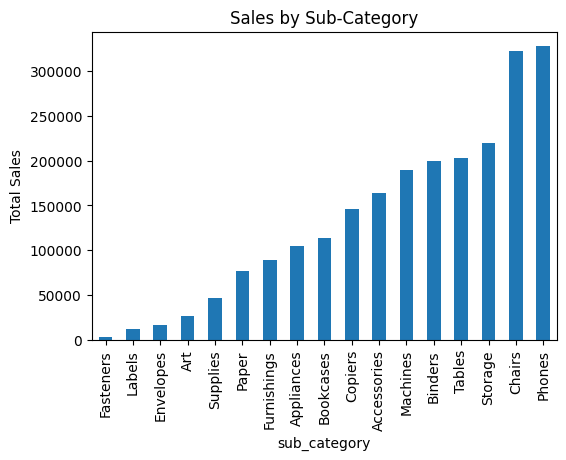

In [36]:
plt.figure(figsize = (6,4))
df.groupby('sub_category')['sales'].sum().sort_values().plot(kind = 'bar')
plt.title('Sales by Sub-Category')
plt.ylabel('Total Sales')
plt.show()

### Shipping Performance Analysis

In [37]:
df['shipping_days'] = (df['ship_date'] - df['order_date']).dt.days

In [38]:
df['shipping_days'].describe()

count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: shipping_days, dtype: float64

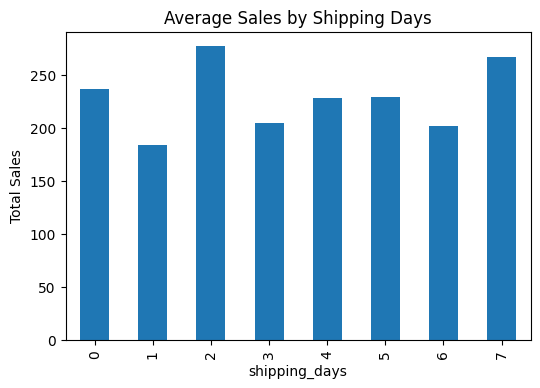

In [39]:
plt.figure(figsize = (6,4))
df.groupby('shipping_days')['sales'].mean().plot(kind = 'bar')
plt.title('Average Sales by Shipping Days')
plt.ylabel('Total Sales')
plt.show()

### Segment-Wise Sales

In [40]:
df.groupby('segment')['sales'].sum()

segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: sales, dtype: float64

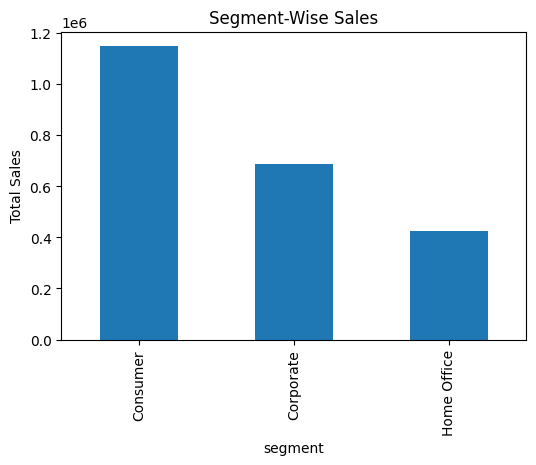

In [41]:
plt.figure(figsize = (6,4))
df.groupby('segment')['sales'].sum().plot(kind = 'bar')
plt.title('Segment-Wise Sales')
plt.ylabel('Total Sales')
plt.show()

### Top Customers By Sales

In [42]:
df.groupby('customer_name')['sales'].sum().sort_values(ascending = False).head(10)

customer_name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: sales, dtype: float64

### Location Based Sales Analysis

In [43]:
# State
df.groupby('state')['sales'].sum().sort_values(ascending = False).head(10)

state
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: sales, dtype: float64

In [44]:
# City
df.groupby('city')['sales'].sum().sort_values(ascending = False).head(10)

city
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109041.1200
Philadelphia     108841.7490
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Name: sales, dtype: float64

## Database Integration (SQLite)

In [45]:
import sqlite3

In [46]:
conn = sqlite3.connect("superstore.db")

### Business KPIs

In [59]:
# Total sales
query = """  SELECT ROUND(SUM(sales),2) AS total_sales FROM superstore_orders; """
pd.read_sql_query(query, conn)

,total_sales
0,2261536.78


In [60]:
# Average order values
query = """ SELECT ROUND(AVG(sales),2) AS average_order_value from superstore_orders; """
pd.read_sql_query(query, conn)

,average_order_value
0,230.77


In [61]:
# Minimum and Maximum Sales
query = """ SELECT ROUND(MIN(sales), 2) AS min_sales, ROUND(MAX(sales),2) AS max_sales FROM superstore_orders; """
pd.read_sql_query(query, conn)

,min_sales,max_sales
0,0.44,22638.48


### Time Based Analysis

In [64]:
# Yearly Sales Analysis
query = """ SELECT strftime('%Y', order_date) AS year,
ROUND(SUM(sales), 2) AS total_sales
FROM superstore_orders GROUP BY year ORDER BY year; """
pd.read_sql_query(query, conn)

,year,total_sales
0,2015,479856.21
1,2016,459436.01
2,2017,600192.55
3,2018,722052.02


In [65]:
# Monthly Sales Analysis
query = """ SELECT strftime('%m', order_date) as month, ROUND(SUM(sales), 2) AS total_sales 
FROM superstore_orders GROUP BY month ORDER BY month; """
pd.read_sql_query(query, conn)

,month,total_sales
0,01,94291.63
1,02,59371.12
2,03,197573.59
3,04,136283.00
4,05,154086.72
5,06,145837.52
6,07,145535.69
7,08,157315.93
8,09,300103.41
9,10,199496.29


### Regional Locational Analysis

In [66]:
# Sales BY Region
query = """ SELECT region, ROUND(SUM(sales), 2) AS total_sales
FROM superstore_orders GROUP BY region ORDER BY total_sales DESC; """
pd.read_sql_query(query, conn)

,region,total_sales
0,West,710219.68
1,East,669518.73
2,Central,492646.91
3,South,389151.46


In [67]:
# Sales by States(Top 10)
query = """ SELECT state, ROUND(SUM(sales), 2) AS total_sales
FROM superstore_orders GROUP BY state ORDER BY total_sales DESC LIMIT 10; """
pd.read_sql_query(query, conn)

,state,total_sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


In [68]:
# Sales by City(top 10)
query = """ SELECT city, ROUND(SUM(sales), 2) AS total_sales
FROM superstore_orders GROUP BY city ORDER BY total_sales DESC LIMIT 10; """
pd.read_sql_query(query, conn)

,city,total_sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


### Category and Product Performance

In [69]:
# Sales by Category
query = """ SELECT category, ROUND(SUM(sales), 2) AS total_sales
FROM superstore_orders GROUP BY category ORDER BY total_sales DESC; """
pd.read_sql_query(query, conn)

,category,total_sales
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


In [70]:
# Sales by Sub-category
query = """ SELECT sub_category, ROUND(SUM(sales), 2) AS total_sales
FROM superstore_orders GROUP BY sub_category ORDER BY total_sales DESC; """
pd.read_sql_query(query, conn)

,sub_category,total_sales
0,Phones,327782.45
1,Chairs,322822.73
2,Storage,219343.39
3,Tables,202810.63
4,Binders,200028.79
5,Machines,189238.63
6,Accessories,164186.70
7,Copiers,146248.09
8,Bookcases,113813.20
9,Appliances,104618.40


### Customer and segment analysis

In [71]:
# Sales by segment
query = """ SELECT segment, ROUND(SUM(sales), 2) AS total_sales
FROM superstore_orders GROUP BY segment ORDER BY total_sales DESC; """
pd.read_sql_query(query, conn)

,segment,total_sales
0,Consumer,1148060.53
1,Corporate,688494.07
2,Home Office,424982.18


In [72]:
# Top 10 customers
query = """ SELECT customer_id, customer_name, ROUND(SUM(sales), 2) AS total_sales
FROM superstore_orders GROUP BY customer_id, customer_name ORDER BY total_sales DESC LIMIT 10; """
pd.read_sql_query(query, conn)

,customer_id,customer_name,total_sales
0,SM-20320,Sean Miller,25043.05
1,TC-20980,Tamara Chand,19052.22
2,RB-19360,Raymond Buch,15117.34
3,TA-21385,Tom Ashbrook,14595.62
4,AB-10105,Adrian Barton,14473.57
5,KL-16645,Ken Lonsdale,14175.23
6,SC-20095,Sanjit Chand,14142.33
7,HL-15040,Hunter Lopez,12873.30
8,SE-20110,Sanjit Engle,12209.44
9,CC-12370,Christopher Conant,12129.07


In [73]:
# Customer order frequency
query = """ SELECT customer_id, customer_name, COUNT(order_id) AS total_orders
FROM superstore_orders GROUP BY customer_id, customer_name ORDER BY total_orders DESC LIMIT 10; """
pd.read_sql_query(query, conn)

,customer_id,customer_name,total_orders
0,WB-21850,William Brown,35
1,MA-17560,Matt Abelman,34
2,PP-18955,Paul Prost,34
3,JL-15835,John Lee,33
4,CK-12205,Chloris Kastensmidt,32
5,JD-15895,Jonathan Doherty,32
6,SV-20365,Seth Vernon,32
7,AP-10915,Arthur Prichep,31
8,EP-13915,Emily Phan,31
9,ZC-21910,Zuschuss Carroll,31


#### Outlier and High-Value Order Analysis

In [74]:
query = """ SELECT order_id, customer_name, ROUND(sales, 2) AS sales
FROM superstore_orders ORDER BY sales DESC LIMIT 10; """
pd.read_sql_query(query, conn)

,order_id,customer_name,sales
0,CA-2015-145317,Sean Miller,22638.48
1,CA-2017-118689,Tamara Chand,17499.95
2,CA-2018-140151,Raymond Buch,13999.96
3,CA-2018-127180,Tom Ashbrook,11199.97
4,CA-2018-166709,Hunter Lopez,10499.97
5,CA-2017-117121,Adrian Barton,9892.74
6,CA-2015-116904,Sanjit Chand,9449.95
7,US-2017-107440,Bill Shonely,9099.93
8,CA-2017-158841,Sanjit Engle,8749.95
9,CA-2017-143714,Christopher Conant,8399.98


In [75]:
# High-value orders
query = """ SELECT * FROM superstore_orders WHERE ROUND(sales, 2) > 3 * (SELECT ROUND(AVG(sales), 2) FROM superstore_orders); """
pd.read_sql_query(query, conn)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,year,month,shipping_days
0,2,CA-2017-152156,2017-11-08 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,3
1,4,US-2016-108966,2016-10-11 00:00:00,2016-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,7
2,8,CA-2015-115812,2015-06-09 00:00:00,2015-06-14 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,2015,6,5
3,11,CA-2015-115812,2015-06-09 00:00:00,2015-06-14 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,2015,6,5
4,12,CA-2015-115812,2015-06-09 00:00:00,2015-06-14 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,2015,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,9742,CA-2016-117086,2016-11-08 00:00:00,2016-11-12 00:00:00,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,05401,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.9000,2016,11,4
768,9749,US-2015-140914,2015-11-11 00:00:00,2015-11-15 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Chicago,...,60653.0,Central,FUR-CH-10003379,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,797.9440,2015,11,4
769,9760,CA-2017-146913,2017-10-31 00:00:00,2017-11-05 00:00:00,Standard Class,SF-20965,Sylvia Foulston,Corporate,United States,San Francisco,...,94109.0,West,FUR-CH-10001854,Furniture,Chairs,Office Star - Professional Matrix Back Chair w...,1403.9200,2017,10,5
770,9775,CA-2015-169019,2015-07-26 00:00:00,2015-07-30 00:00:00,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,78207.0,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.5840,2015,7,4


In [76]:
# Region-wise category performance
query = """ SELECT region, category, ROUND(SUM(sales), 2) AS total_sales
FROM superstore_orders GROUP BY region, category ORDER BY region, total_sales DESC; """
pd.read_sql_query(query, conn)

,region,category,total_sales
0,Central,Technology,168739.21
1,Central,Office Supplies,163590.24
2,Central,Furniture,160317.46
3,East,Technology,263116.53
4,East,Furniture,206461.39
5,East,Office Supplies,199940.81
6,South,Technology,148195.21
7,South,Office Supplies,124424.77
8,South,Furniture,116531.48
9,West,Technology,247404.93


In [77]:
# Best Category per Region
query = """ SELECT region, category, total_sales FROM (SELECT region, category, ROUND(SUM(sales), 2) AS total_sales, RANK() OVER(PARTITION BY region ORDER BY SUM(sales) DESC) AS rnk FROM superstore_orders GROUP BY region, category) WHERE rnk = 1; """
pd.read_sql_query(query, conn)

,region,category,total_sales
0,Central,Technology,168739.21
1,East,Technology,263116.53
2,South,Technology,148195.21
3,West,Technology,247404.93


#### Quality Check

In [79]:
# Check missing postal codes
query = """ SELECT COUNT(*) AS mising_postal_code FROM superstore_orders WHERE postal_code IS NULL; """
pd.read_sql_query(query, conn)

,mising_postal_code
0,0


In [80]:
# Check duplicate orders
query = """ SELECT order_id, COUNT(*) FROM superstore_orders GROUP BY order_id HAVING COUNT(*)>1; """
pd.read_sql_query(query, conn)

,order_id,COUNT(*)
0,CA-2015-100090,2
1,CA-2015-100363,2
2,CA-2015-100678,4
3,CA-2015-100706,2
4,CA-2015-100762,4
...,...,...
2418,US-2018-168116,2
2419,US-2018-169320,2
2420,US-2018-169488,2
2421,US-2018-169502,2
